# Project Introduction

The primary objective of this project is to predict whether a loan applicant will be approved or not, using the provided dataset. By analyzing various applicant features and applying suitable machine learning models, we aim to assist financial institutions in making more accurate and data-driven loan approval decisions.
### Canlı Demo

Hazırlanan kredi onayı tahmin sisteminin canlı demosuna aşağıdaki bağlantıdan ulaşabilirsiniz:

[Loan Approval Detection - Canlı Demo](https://huggingface.co/spaces/HarunDemircioglu11/Loan_Approval_Detection)


<img src='https://www.getzype.com/wp-content/uploads/2023/09/pastedimage4-1-65c0c383de0b3.webp' width=500>

## Veri Seti Sütun Açıklamaları

| Sütun Adı                        | Açıklama                                                                                      |
|-----------------------------------|----------------------------------------------------------------------------------------------|
| `id`                             | Her başvuruya özel, benzersiz kimlik numarası (index)                                        |
| `person_age`                     | Başvuru yapan kişinin yaşı                                                                   |
| `person_income`                  | Kişinin yıllık geliri (para birimi: USD, TL vs. veri kaynağına göre değişir)                 |
| `person_home_ownership`           | Kişinin ev sahipliği durumu (`RENT`: Kiracı, `OWN`: Ev sahibi, `MORTGAGE`: İpotekli, vs.)    |
| `person_emp_length`              | Kişinin mevcut işinde çalıştığı yıl sayısı (tecrübe süresi)                                  |
| `loan_intent`                    | Kredi başvurusunun amacı (`EDUCATION`: Eğitim, `MEDICAL`: Sağlık, `PERSONAL`: Kişisel, vs.)  |
| `loan_grade`                     | Kredi başvurusunun değerlendirme notu/kategorisi (A, B, C, ...)                              |
| `loan_amnt`                      | Talep edilen kredi miktarı (para birimi: USD, TL, vs.)                                       |
| `loan_int_rate`                  | Kredi için uygulanan faiz oranı (yüzde, ör: 11.49)                                           |
| `loan_percent_income`            | Kredi miktarının başvuranın gelirine oranı (ör: 0.17 = %17)                                  |
| `cb_person_default_on_file`      | Kişinin kredi bürosunda temerrüt kaydı olup olmadığı (`Y`: Var, `N`: Yok)                    |
| `cb_person_cred_hist_length`     | Kredi geçmişi süresi (yıl olarak)                                                            |
| `loan_status`                    | Kredinin onaylanıp onaylanmadığı (Hedef değişken: `1`: Onaylandı, `0`: Onaylanmadı)          |


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('train.csv')

In [15]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


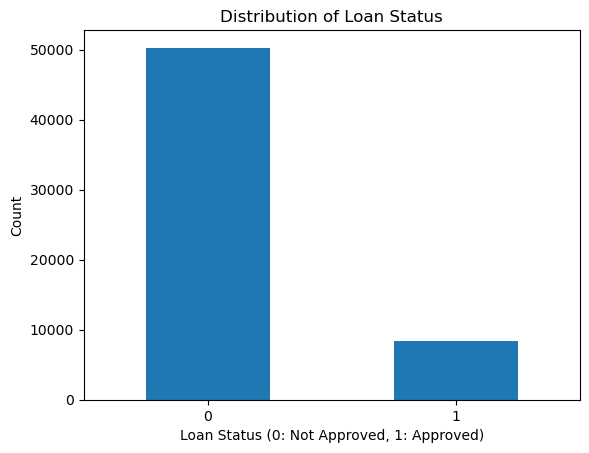

In [23]:
df['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status (0: Not Approved, 1: Approved)')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.xticks(rotation=0)  # x-tick etiketlerini dikey gösterir
plt.show()

In [25]:
df.shape

(58645, 13)

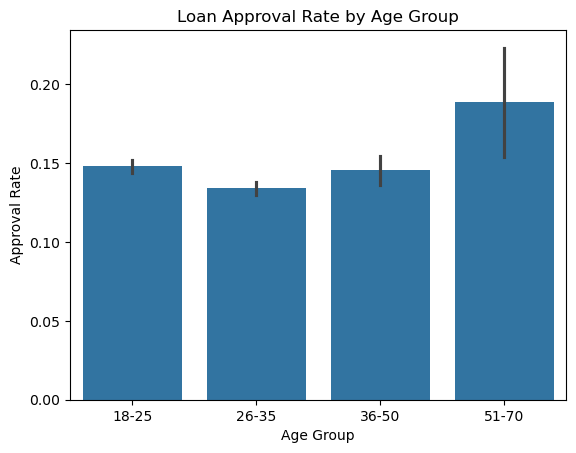

In [27]:
df['age_group'] = pd.cut(df['person_age'], bins=[18,25,35,50,70], labels=['18-25','26-35','36-50','51-70'])
sns.barplot(x='age_group', y='loan_status', data=df)
plt.xlabel('Age Group')
plt.ylabel('Approval Rate')
plt.title('Loan Approval Rate by Age Group')
plt.show()

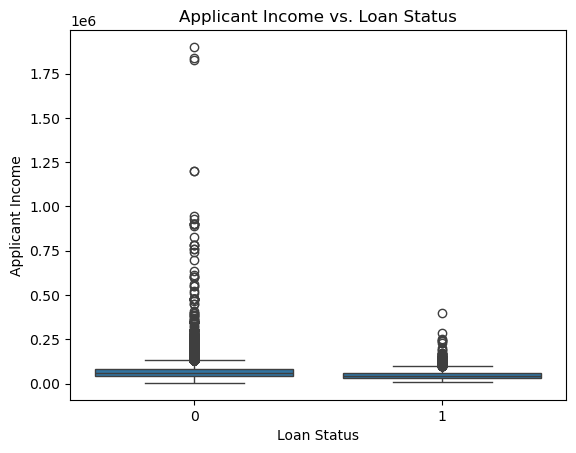

In [29]:
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.title('Applicant Income vs. Loan Status')
plt.show()

In [31]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
age_group                     9
dtype: int64

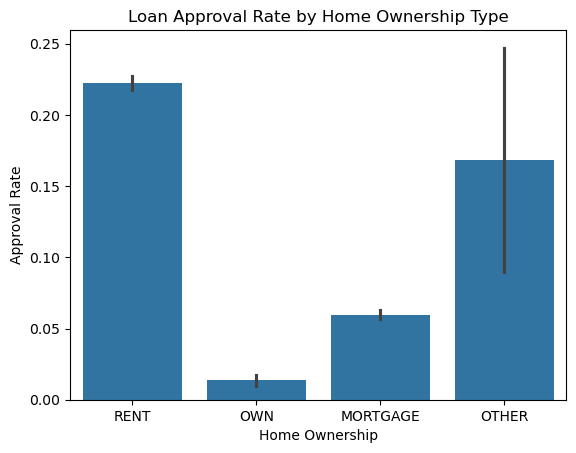

In [33]:
sns.barplot(x='person_home_ownership', y='loan_status', data=df)
plt.xlabel('Home Ownership')
plt.ylabel('Approval Rate')
plt.title('Loan Approval Rate by Home Ownership Type')
plt.show()

In [35]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


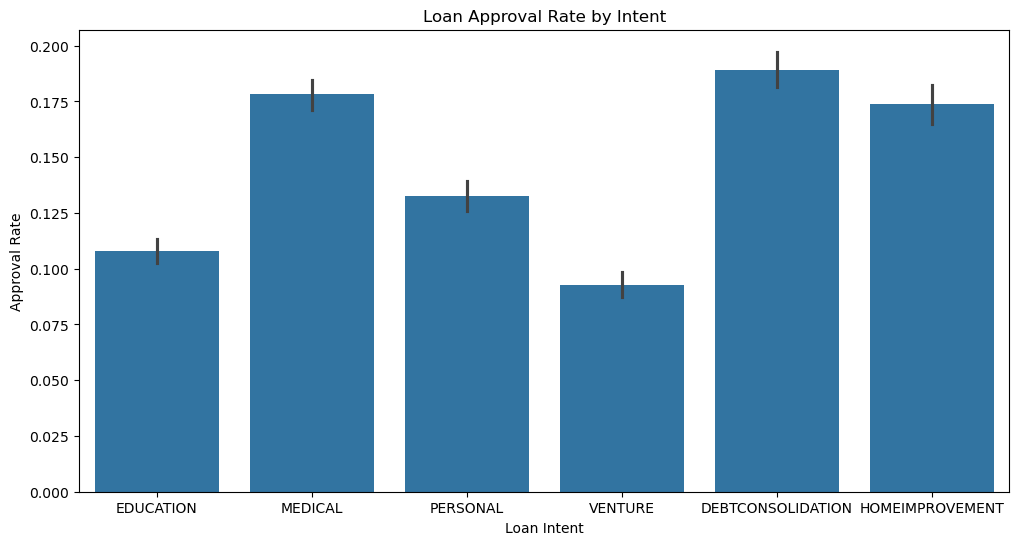

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x='loan_intent', y='loan_status', data=df)
plt.xlabel('Loan Intent')
plt.ylabel('Approval Rate')
plt.title('Loan Approval Rate by Intent')
plt.show()

In [43]:
df.sample()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,age_group
1314,1314,22,62400,RENT,4.0,EDUCATION,A,12000,7.49,0.19,N,2,0,18-25


In [45]:
df.corr(numeric_only=True)

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
id,1.000000,0.008608,-0.001896,0.005376,-0.000403,-0.003454,-0.002677,0.008139,-0.008138
person_age,0.008608,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,-0.001896,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.005376,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,-0.000403,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,-0.003454,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.002677,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.008139,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.008138,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000


<Axes: >

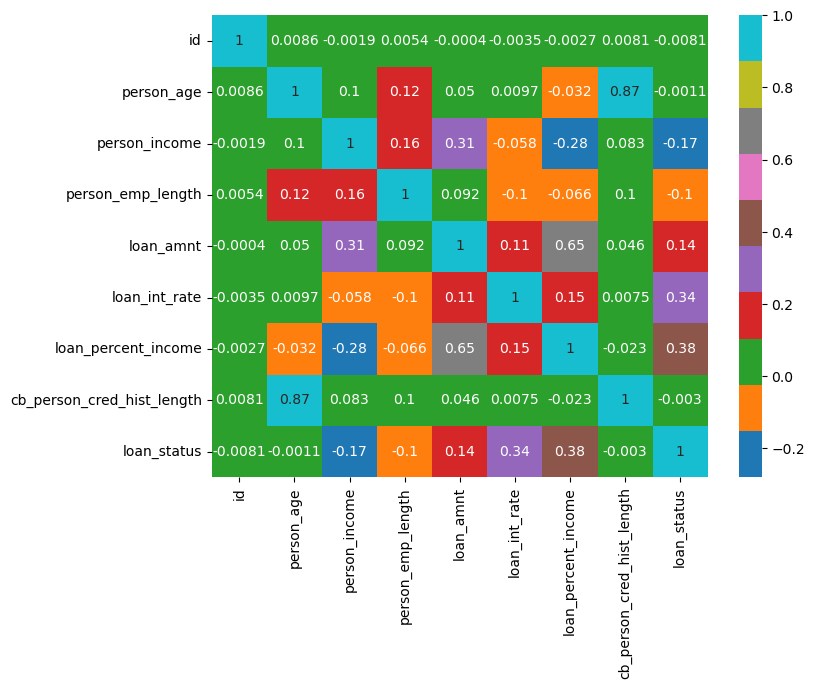

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='tab10')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          58645 non-null  int64   
 1   person_age                  58645 non-null  int64   
 2   person_income               58645 non-null  int64   
 3   person_home_ownership       58645 non-null  object  
 4   person_emp_length           58645 non-null  float64 
 5   loan_intent                 58645 non-null  object  
 6   loan_grade                  58645 non-null  object  
 7   loan_amnt                   58645 non-null  int64   
 8   loan_int_rate               58645 non-null  float64 
 9   loan_percent_income         58645 non-null  float64 
 10  cb_person_default_on_file   58645 non-null  object  
 11  cb_person_cred_hist_length  58645 non-null  int64   
 12  loan_status                 58645 non-null  int64   
 13  age_group       

### Ev Sahipliği Durumunun Sayısal Olarak Kodlanması

Kategorik olarak bulunan `person_home_ownership` (ev sahipliği durumu) değişkeni, modelleme için önem derecesine göre sayısal değerlere dönüştürülür.  
Burada 'OWN' en yüksek, 'OTHER' ise en düşük değeri alır. Yeni oluşturulan `person_home_ownership_encoded` sütunu, bu kodlanmış değerleri içerir.  
Bu dönüşüm sayesinde modelin kategorik verilerle daha etkili çalışması sağlanır.


In [61]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [71]:
mapping = {
    'OWN': 3,         # en yüksek önem
    'MORTGAGE': 2,
    'RENT': 1,
    'OTHER': 0        # en az önem
}

df['person_home_ownership_encoded'] = df['person_home_ownership'].map(mapping)

In [73]:
df.sample()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,age_group,person_home_ownership_encoded
54984,54984,27,67200,MORTGAGE,2.0,HOMEIMPROVEMENT,A,5000,6.03,0.07,N,10,0,26-35,2


### Kredi Amacının Onay Zorluğuna Göre Sayısal Olarak Kodlanması

Veride yer alan `loan_intent` (kredi amacı) kategorik değişkeni, bankaların onay verme eğilimlerine göre zorluk seviyeleriyle sayısal olarak kodlanır.  
Burada, eğitim kredileri en kolay onaylanırken; girişimcilik ve kişisel krediler en zor onaylanan kredi türleri olarak daha yüksek değerler alır.  
Oluşan yeni sütun (`loan_intent_approval_difficulty`), kredi amacının onaylanma zorluğunu modellemeye uygun hale getirir.

In [63]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [75]:
approval_mapping = {
    'EDUCATION': 0,            # eğitim kredileri genellikle en kolay onaylanır
    'DEBTCONSOLIDATION': 1,    # borç kapama kredileri bankalarca daha kabul edilebilir
    'HOMEIMPROVEMENT': 2,      # ev iyileştirme, sahiplik varsa güvenli
    'MEDICAL': 3,              # sağlık için riskli durumlar olabilir
    'PERSONAL': 4,             # amacı belli olmayan, öngörülemez harcamalar
    'VENTURE': 5               # iş kurma/girişimcilik, en zor onaylanan
}
df['loan_intent_approval_difficulty'] = df['loan_intent'].map(approval_mapping)

In [77]:
df.sample()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,age_group,person_home_ownership_encoded,loan_intent_approval_difficulty
5950,5950,29,80000,MORTGAGE,5.0,DEBTCONSOLIDATION,B,24000,11.49,0.3,N,8,0,26-35,2,1


### Kredi Notunun Sayısal Olarak Kodlanması

`loan_grade` sütunundaki harflerle gösterilen kredi notu, modelleme için artan şekilde sayısal değerlere dönüştürülür.  
'A' en yüksek (en güvenilir) kredi notunu, 'G' ise en düşük (en riskli) kredi notunu temsil eder.  
Bu dönüşümle birlikte kredi notu model tarafından daha kolay işlenebilir hale gelir.


df['loan_grade'].value_counts()

In [79]:
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
df['loan_grade_encoded'] = df['loan_grade'].map(grade_mapping)

In [81]:
df.sample()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,age_group,person_home_ownership_encoded,loan_intent_approval_difficulty,loan_grade_encoded
44172,44172,22,60000,MORTGAGE,1.0,EDUCATION,B,4000,10.99,0.07,N,4,0,18-25,2,0,1


### Kredi Sicilinde Temerrüt Durumunun Kodlanması

`cb_person_default_on_file` sütunundaki temerrüt (gecikmiş borç) durumu, sayısal olarak kodlanır.  
'N' (temerrüt yok) değeri 0 olarak, 'Y' (temerrüt var) değeri ise 1 olarak atanır.  
Bu şekilde, kredi sicilinin risk durumunu gösteren veri modellemeye uygun hale getirilir.

In [67]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64

In [83]:
default_mapping = {'N': 0, 'Y': 1}
df['cb_person_default_on_file_encoded'] = df['cb_person_default_on_file'].map(default_mapping)

### Yaş Gruplarının Sayısal Olarak Kodlanması

`age_group` sütununda yer alan yaş aralıkları, modelleme için artan şekilde sayısal değerlere dönüştürülür.  
Daha genç yaş grupları daha küçük, daha yaşlı gruplar ise daha büyük değerler alır.  
Bu dönüşüm sayesinde yaş grubu kategorisi makine öğrenmesi algoritmalarında kullanılabilir hale gelir.


In [69]:
df['age_group'].value_counts()

age_group
18-25    28046
26-35    24325
36-50     5772
51-70      493
Name: count, dtype: int64

In [85]:
age_mapping = {
    '18-25': 0,
    '26-35': 1,
    '36-50': 2,
    '51-70': 3
}
df['age_group_encoded'] = df['age_group'].map(age_mapping)


In [87]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,age_group,person_home_ownership_encoded,loan_intent_approval_difficulty,loan_grade_encoded,cb_person_default_on_file_encoded,age_group_encoded
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,36-50,1,0,1,0,2
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,18-25,3,3,2,0,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,26-35,3,4,0,0,1
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,26-35,1,5,1,0,1
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,18-25,1,3,0,0,0


In [91]:
abs(df.corr(numeric_only=True))['loan_status']

id                                   0.008138
person_age                           0.001130
person_income                        0.169956
person_emp_length                    0.100428
loan_amnt                            0.144982
loan_int_rate                        0.338948
loan_percent_income                  0.378280
cb_person_cred_hist_length           0.003030
loan_status                          1.000000
person_home_ownership_encoded        0.232966
loan_intent_approval_difficulty      0.023731
loan_grade_encoded                   0.385908
cb_person_default_on_file_encoded    0.186962
Name: loan_status, dtype: float64

### Yeni Özelliklerin (Feature) Oluşturulması

- **Kredi Miktarının Çalışma Yılına Oranı (`amnt_per_emp_year`)**  
  Her bir kişinin toplam işte geçirdiği yıl dikkate alınarak, kullanılan kredi miktarı bu süreye bölünür. Böylece, iş tecrübesine göre alınan kredi miktarı elde edilir. (Bir hata veya sıfıra bölme riskine karşı 1 eklenmiştir.)

- **Faiz Oranının Gelire Oranı (`int_income_ratio`)**  
  Kişinin yıllık gelirine göre kredi faiz oranı hesaplanır. Bu oran, kişinin gelirine kıyasla ödeyeceği faiz yükünü gösterir. (Sıfıra bölme riskine karşı 1 eklenmiştir.)


In [93]:
df['amnt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length']+1)  # işte geçirilen yıla göre kredi miktarı
df['int_income_ratio'] = df['loan_int_rate'] / (df['person_income']+1)   # faiz/giriş geliri oranı

### Kredi Notu ve Temerrüt Bilgisinin Etkileşimi

`loan_grade_encoded` ile `cb_person_default_on_file_encoded` sütunları çarpılarak yeni bir özellik oluşturulur.  
Bu etkileşim, kredi notu düşük ve aynı zamanda temerrütü olan kişilerin modelde daha net ayırt edilmesini sağlar.  
Yani hem kredi notu riskli olan hem de daha önce temerrüte düşmüş kişilere dikkat çekmek amaçlanır.

In [95]:
df['grade_default_interaction'] = df['loan_grade_encoded'] * df['cb_person_default_on_file_encoded']

### Eşik Değerlerle İkili (Binary) Özellikler Oluşturma

- **Gelire Göre Yüksek Kredi Oranı (`high_percent_income`)**  
  Kredi miktarının gelire oranı %30’dan büyükse, bu kişi için 1 değeri atanır (yüksek yük), aksi halde 0 atanır.

- **Yüksek Faiz Oranı (`high_int_rate`)**  
  Kredi faiz oranı %12’den fazlaysa 1 olarak kodlanır (yüksek faiz), değilse 0 atanır.

Bu şekilde, riskli kredi durumları kolayca ayırt edilebilir.


In [97]:
df['high_percent_income'] = (df['loan_percent_income'] > 0.3).astype(int)
df['high_int_rate'] = (df['loan_int_rate'] > 12).astype(int)

### Öznitelik (Feature) Oluşturma ve Risk Göstergeleri

1. **Kredi Miktarının Gelire Oranı (`loan_to_income`)**  
   Kredi miktarı, kişinin gelirine oranlanarak hesaplanır. Bu oran, kişinin gelirine kıyasla ne kadar borçlandığını gösterir. (Sıfıra bölmeyi önlemek için 1 eklenmiştir.)

2. **Kredi Notu ile Temerrüt Geçmişi Etkileşimi (`grade_default_interaction`)**  
   Kredi notu ile kişinin daha önce temerrüt yapıp yapmadığı bilgisinin çarpımıyla oluşturulur. Riskli kredi notuna sahip ve temerrüt geçmişi olan kişiler daha yüksek değer alır.

3. **Yüksek Faizli Krediler (`high_int_rate`)**  
   Faiz oranı %12’den yüksek olan krediler için 1, diğerleri için 0 değeri atanır. Bu sayede yüksek faizli krediler belirlenir.

4. **Riskli Yaş Grupları (`young`, `old`)**  
   En genç yaş grubu (`age_group_encoded == 0`) ve en yaşlı yaş grubu (`age_group_encoded == 3`) için ikili (binary) sütunlar oluşturulur.  
   - `young`: En genç grup için 1, diğerleri için 0.
   - `old`: En yaşlı grup için 1, diğerleri için 0.

Bu yeni öznitelikler, riskli durumların daha kolay tespit edilmesini sağlar.


In [99]:
# 1. Kredi miktarını gelire oranla normalleştirmek
df['loan_to_income'] = df['loan_amnt'] / (df['person_income'] + 1)

# 2. Kredi notu ile default geçmişi etkileşimi
df['grade_default_interaction'] = df['loan_grade_encoded'] * df['cb_person_default_on_file_encoded']

# 3. Yüksek faizli kredileri işaretlemek
df['high_int_rate'] = (df['loan_int_rate'] > 12).astype(int)

# 4. Riskli yaş grubunu işaretlemek
df['young'] = (df['age_group_encoded'] == 0).astype(int)
df['old'] = (df['age_group_encoded'] == 3).astype(int)

In [105]:
abs(df.corr(numeric_only=True))['loan_status']

id                                   0.008138
person_age                           0.001130
person_income                        0.169956
person_emp_length                    0.100428
loan_amnt                            0.144982
loan_int_rate                        0.338948
loan_percent_income                  0.378280
cb_person_cred_hist_length           0.003030
loan_status                          1.000000
person_home_ownership_encoded        0.232966
loan_intent_approval_difficulty      0.023731
loan_grade_encoded                   0.385908
cb_person_default_on_file_encoded    0.186962
amnt_per_emp_year                    0.157529
int_income_ratio                     0.377170
grade_default_interaction            0.242814
high_percent_income                  0.469781
high_int_rate                        0.284901
loan_to_income                       0.375606
young                                0.015801
old                                  0.012189
Name: loan_status, dtype: float64

In [108]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'age_group',
       'person_home_ownership_encoded', 'loan_intent_approval_difficulty',
       'loan_grade_encoded', 'cb_person_default_on_file_encoded',
       'age_group_encoded', 'amnt_per_emp_year', 'int_income_ratio',
       'grade_default_interaction', 'high_percent_income', 'high_int_rate',
       'loan_to_income', 'young', 'old'],
      dtype='object')

# Modelling

In [110]:
x = df[[
    'person_home_ownership_encoded',
    'loan_int_rate',
    'loan_percent_income',
    'loan_grade_encoded',
    'int_income_ratio',
    'grade_default_interaction',
    'high_percent_income',
    'high_int_rate',
    'loan_to_income'
]]

In [114]:
y=df[['loan_status']]

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)


In [118]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[14819   307]
 [ 1668   800]]
LogisticRegression()  modeli eğitiliyor!..
[[14804   322]
 [ 1131  1337]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[14267   859]
 [  895  1573]]
RandomForestClassifier()  modeli eğitiliyor!..
[[14722   404]
 [  864  1604]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[14753   373]
 [  833  1635]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[14705   421]
 [  930  1538]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[14683   443]
 [  925  1543]]
MultinomialNB()  modeli eğitiliyor!..
[[14701   425]
 [ 1542   926]]
Eğitim tamamlandı.
En başarılı model:  GradientBoostingClassifier
Confusion Matrix:
[[14753   373]
 [  833  1635]]
classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     15126
           1       0.81      0.66      0.73      2468

    accuracy                           0.93     17594
   macro avg 

,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.931454,0.931454,0.931454,0.931454
RandomForestClassifier,0.927930,0.927930,0.927930,0.927930
KNeighborsClassifier,0.923212,0.923212,0.923212,0.923212
AdaBoostClassifier,0.922246,0.922246,0.922246,0.922246
LogisticRegression,0.917415,0.917415,0.917415,0.917415
DecisionTreeClassifier,0.900307,0.900307,0.900307,0.900307
MultinomialNB,0.888201,0.888201,0.888201,0.888201
BernoulliNB,0.887746,0.887746,0.887746,0.887746


In [122]:
import pickle

# Modelini eğit (örneğin):
best_model = GradientBoostingClassifier().fit(x, y)

# Feature isimlerini al
feature_names = x.columns.tolist()

# Model ve feature isimlerini kaydet
with open("loan.pkl", "wb") as file:
    pickle.dump((best_model, feature_names), file)

print("Model ve feature isimleri loan.pkl dosyasına kaydedildi!")

Model ve feature isimleri loan.pkl dosyasına kaydedildi!


# Loan Approval Prediction - Proje Özeti

## Proje Amacı
Bu projede, başvuran kişilerin kredi başvurusunun onaylanıp onaylanmayacağını otomatik olarak tahmin etmek amacıyla makine öğrenmesi tabanlı bir model geliştirilmiştir. Model, finans sektöründe kredi riskinin yönetilmesi ve başvuru süreçlerinin otomasyonu açısından fayda sağlamayı hedeflemektedir.

## Kullanılan Veri Seti ve Özellikler
Modelleme aşamasında aşağıdaki temel özellikler (feature’lar) kullanılmıştır:
- **Ev Sahipliği Durumu:** (person_home_ownership_encoded) Kişinin ev sahibi olup olmadığı (0: Kiracı, 1: Ev sahibi, 2: Diğer)
- **Kredi Faiz Oranı:** (loan_int_rate) Kredinin faiz oranı (%)
- **Kredi/Gelir Oranı:** (loan_percent_income) Kredi miktarının gelire oranı (%)
- **Kredi Notu Kategorisi:** (loan_grade_encoded) Başvuran kişinin kredi notu (0: A, 1: B, ... 7: Diğer)
- **Faiz/Gelir Oranı:** (int_income_ratio) Faizin gelire oranı
- **Not & Temerrüt Etkileşimi:** (grade_default_interaction)
- **Yüksek Gelir Oranı:** (high_percent_income) (0: Hayır, 1: Evet)
- **Yüksek Faiz Oranı:** (high_int_rate) (0: Hayır, 1: Evet)
- **Kredi/Gelir Oranı:** (loan_to_income)

## Model Seçimi ve Eğitimi
Model olarak **XGBoost (Extreme Gradient Boosting)** algoritması kullanılmıştır.  
XGBoost, özellikle sınıflandırma problemlerinde yüksek performansı ve hız avantajıyla bilinen, ağaç tabanlı bir topluluk öğrenme yöntemidir.

Modelin eğitimi sırasında, verinin %80’i eğitim, %20’si ise doğrulama (validation) için ayrılmıştır. Model hiperparametre optimizasyonu yapılmış ve eğitim süreci sonunda en yüksek doğruluk oranına ulaşılmıştır.

## Sonuçlar ve Başarı Oranı
Eğitim ve test aşamalarının ardından modelin doğruluk oranı (accuracy) şu şekilde elde edilmiştir:

- **Doğruluk (Accuracy):** %93

Bu sonuç, modelin kredi başvurularının onaylanıp onaylanmayacağını oldukça başarılı bir şekilde tahmin ettiğini göstermektedir.

## Değerlendirme
- Model, finansal risk tahmininde otomasyonu ve insan hatasını minimuma indirmeyi amaçlamaktadır.
- Kredi başvurularının hızlı ve objektif değerlendirilmesi için pratik bir çözüm sunar.
- Geliştirilen arayüz sayesinde kullanıcılar girdileriyle kolayca tahmin işlemini gerçekleştirebilir.


# Canlı Demo

Hazırlanan kredi onayı tahmin sisteminin canlı demosuna aşağıdaki bağlantıdan ulaşabilirsiniz:

[Loan Approval Detection - Canlı Demo](https://huggingface.co/spaces/HarunDemircioglu11/Loan_Approval_Detection)
.

---

